## Unsupervised Learning to Predict Race from Merged Dataset

In [137]:
#imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data and Inspect

In [138]:
full_data_df = pd.read_csv('final_merged.csv')
full_data_df

print("Shape of the data: ", full_data_df.shape)

full_data_df.info()
full_data_df.head()

Shape of the data:  (9222, 140)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9222 entries, 0 to 9221
Columns: 140 entries, Patient ID to Survival Months
dtypes: float64(77), int64(2), object(61)
memory usage: 9.9+ MB


C:\Users\smcca\AppData\Local\Temp\ipykernel_40524\3584519652.py:1: DtypeWarning: Columns (0,3,4,5,6,7,9,12,15,16,17,18,22,24,26,28,29,30,40,65,66,67,68,69,70,71,72,73,74,75,76,82,83,89,90,91,92,93,96,97,98,99,100,101,102,103,104,105,106,107,108,109,115) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data_df = pd.read_csv('final_merged.csv')


,Patient ID,Age,Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Unnamed: 3,T Stage,6th Stage,Grade,A Stage,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,Breast_MRI_001,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,T2,IIB,Poorly differentiated; Grade III,Regional,Positive,Negative,6.0,1.0,66.0
1,Breast_MRI_001,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,T2,IIB,Moderately differentiated; Grade II,Regional,Positive,Positive,9.0,1.0,72.0
2,Breast_MRI_002,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Breast_MRI_003,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,T2,IIB,Poorly differentiated; Grade III,Regional,Positive,Positive,6.0,1.0,52.0
4,Breast_MRI_003,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,T2,IIB,Moderately differentiated; Grade II,Regional,Positive,Positive,19.0,1.0,55.0


In [139]:
'Radio Therapy' in full_data_df.columns

True

In [140]:
'Clinical Response, Evaluated Through Imaging ' in full_data_df.columns

True

## Data Cleaning

In [ ]:
#Dropping any duplicate rows

'Radio Therapy' in full_data_df.Columns
full_data_df.drop_duplicates(inplace=True)

# Drop features with a lot of missing values
missing__ratio = full_data_df.isnull().mean()
columns_to_drop = missing__ratio[missing__ratio > 0.5].index
full_data_df.drop(columns=columns_to_drop, inplace=True)


In [142]:
# Look at new shape of the data
print("Shape of the data after dropping columns with a lot of missing values: ", full_data_df.shape)

Shape of the data after dropping columns with a lot of missing values:  (9221, 140)


False

In [144]:
#inspecting the race column
full_data_df['Overall Near-complete Response:  Stricter Definition'].value_counts(dropna=False)

#Drop rows with missing values in Race column

full_data_df = full_data_df.dropna(subset=['Overall Near-complete Response:  Stricter Definition'])

#Drop rows where race is = 0
full_data_df = full_data_df[full_data_df['Overall Near-complete Response:  Stricter Definition'] != 0]

full_data_df['Overall Near-complete Response:  Stricter Definition'].value_counts()

full_data_df.drop('Clinical Response, Evaluated Through Imaging ',axis=1)

full_data_df.drop('Pathologic Response to Neoadjuvant Therapy',axis=1)

full_data_df.drop('Pathologic Response to Neoadjuvant Therapy',axis=1)

full_data_df.drop('Overall Near-complete Response:  Looser Definition',axis=1)

full_data_df.drop('Near-complete Response (Graded Measure)',axis=1)



full_data_df['Radio Therapy']


2       NaN
39      NaN
43      NaN
194     NaN
195     NaN
       ... 
4949    NaN
4950    NaN
4951    NaN
4952    NaN
4953    NaN
Name: Radio Therapy, Length: 572, dtype: object

## EDA

In [145]:
full_data_df.describe()

,Age,Surgery,Cohort,ER,Neoplasm Histologic Grade,HER2,Histologic type,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,...,Overall Near-complete Response: Stricter Definition,Overall Near-complete Response: Looser Definition,Near-complete Response (Graded Measure),Unnamed: 98,Race,N Stage,Unnamed: 3,Regional Node Examined,Reginol Node Positive,Survival Months
count,572.000000,27.0,0.0,572.000000,0.0,572.000000,572.000000,0.0,0.0,0.0,...,572.000000,572.000000,572.000000,0.0,572.000000,568.000000,0.0,503.000000,503.000000,503.000000
mean,50.846154,0.0,NaN,0.603147,NaN,0.477273,0.669580,NaN,NaN,NaN,...,1.503497,1.503497,3.524476,NaN,1.152098,1.010563,NaN,12.789264,2.075547,71.854871
std,7.900039,0.0,NaN,0.489673,NaN,0.499920,0.496133,NaN,NaN,NaN,...,0.649657,0.649657,5.058789,NaN,0.631579,0.432247,NaN,8.106815,2.453199,22.094888
min,21.000000,0.0,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN,1.000000,1.000000,4.000000
25%,47.000000,0.0,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,7.000000,1.000000,58.000000
50%,53.000000,0.0,NaN,1.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,12.000000,1.000000,73.000000
75%,58.000000,0.0,NaN,1.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,...,2.000000,2.000000,4.000000,NaN,1.000000,1.000000,NaN,18.000000,2.000000,89.000000
max,73.000000,0.0,NaN,1.000000,NaN,1.000000,2.000000,NaN,NaN,NaN,...,3.000000,3.000000,19.000000,NaN,7.000000,3.000000,NaN,49.000000,26.000000,107.000000


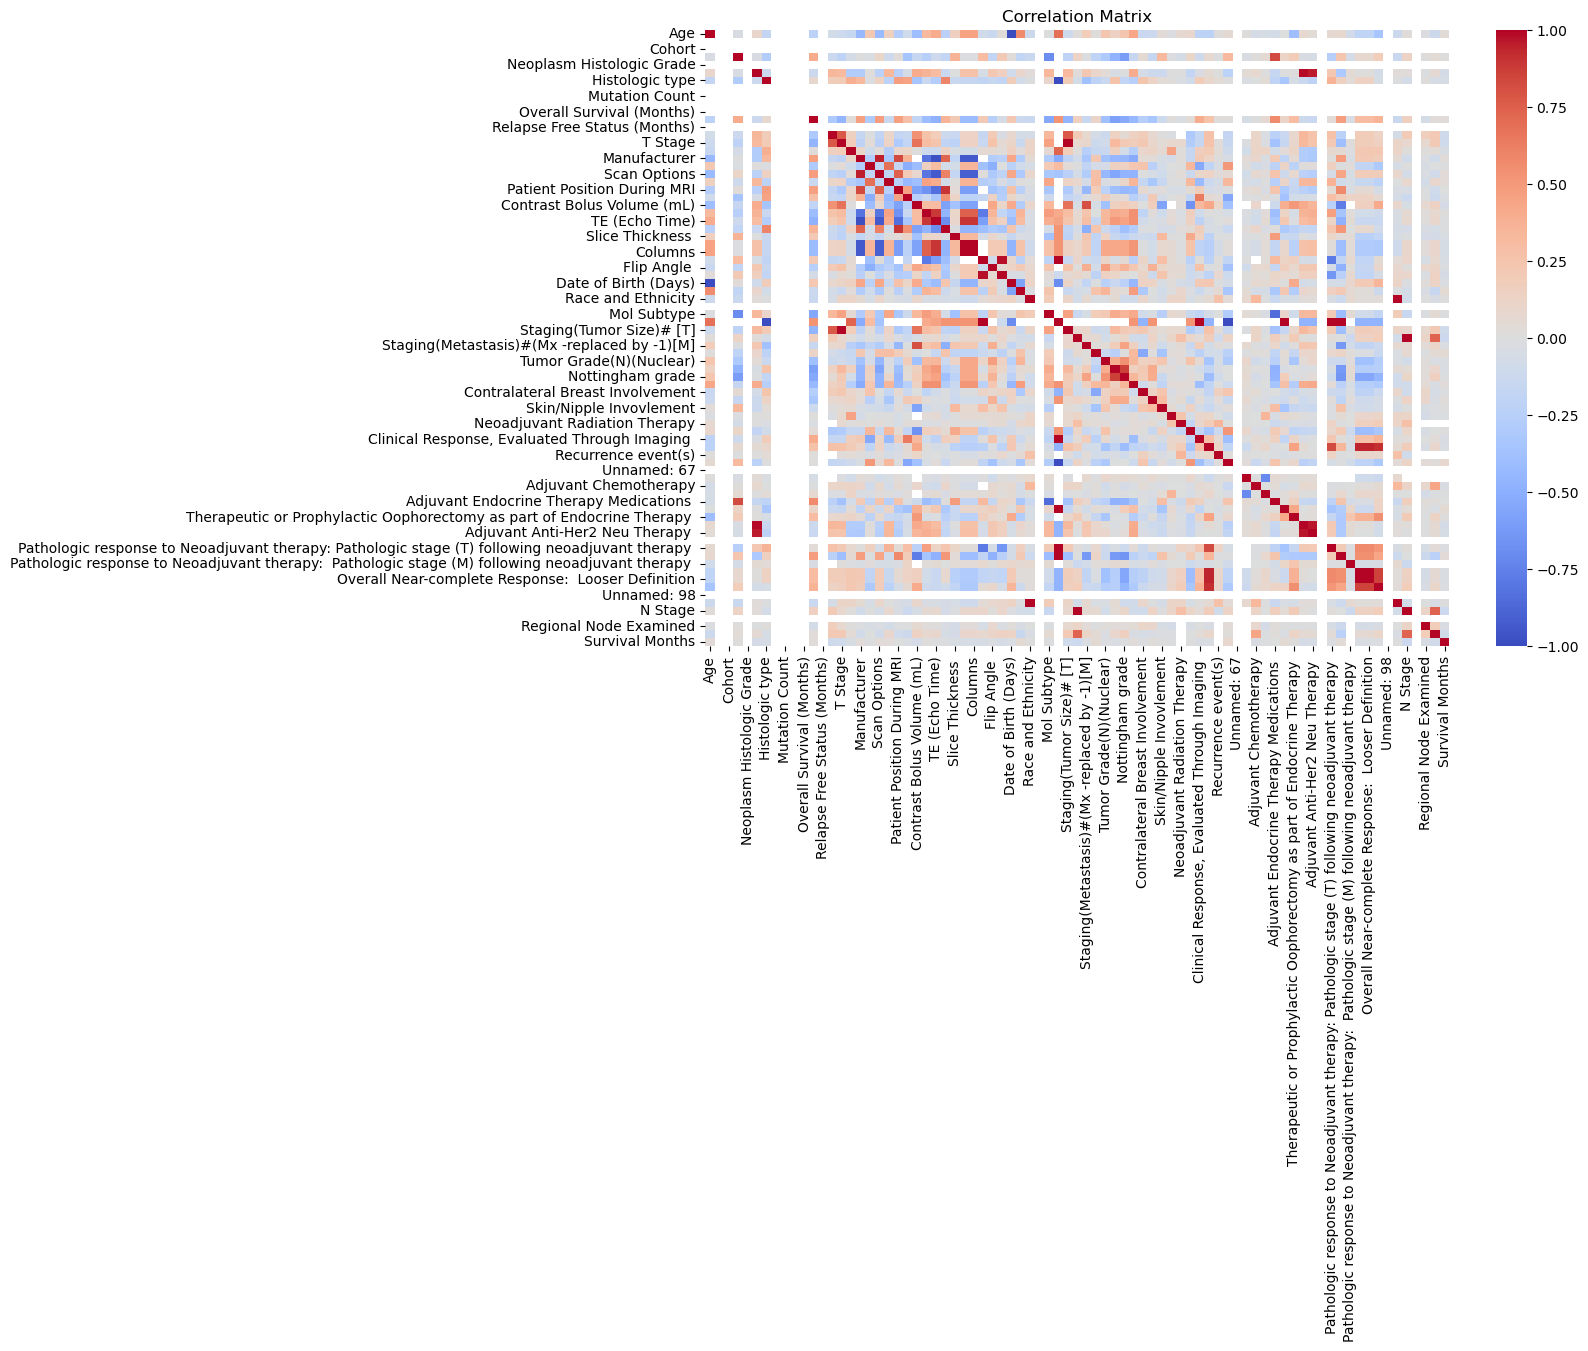

In [146]:
#Coorelation heatmap for numerical features

numeric_features = full_data_df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_features.corr(), annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Guassian and PCA

In [147]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Define target
target_col = 'Overall Near-complete Response:  Stricter Definition'

# Drop columns with too many NaNs (>80%)
full_data_df = full_data_df.loc[:, full_data_df.isnull().mean() < 0.8]

# Keep only numeric columns and exclude the target
numeric_cols = full_data_df.select_dtypes(include=[np.number]).columns
features = numeric_cols.drop(target_col, errors='ignore')  # in case target_col isn't numeric

# Strategy 1: Drop rows with any NaNs
df_dropped = full_data_df[features.union([target_col])].dropna()

# Strategy 2: Fill numeric NaNs with mean
df_filled = full_data_df[features.union([target_col])].copy()
df_filled[features] = df_filled[features].fillna(df_filled[features].mean())

# Scale features only if rows exist
scaler = StandardScaler()

if not df_dropped.empty:
    df_dropped[features] = scaler.fit_transform(df_dropped[features])
else:
    print("No rows left in df_dropped after dropna().")

if not df_filled.empty:
    df_filled[features] = scaler.fit_transform(df_filled[features])
else:
    print("No rows left in df_filled after fillna().")

print(" Dropped dataset shape:", df_dropped.shape)
print(" Filled dataset shape:", df_filled.shape)


No rows left in df_dropped after dropna().
 Dropped dataset shape: (0, 67)
 Filled dataset shape: (572, 67)



Feature Subset Size: 3
Selected Features: ['Staging(Nodes)#(Nx replaced by -1)[N]', 'Staging(Metastasis)#(Mx -replaced by -1)[M]', 'Mol Subtype']
Accuracy: 0.6348


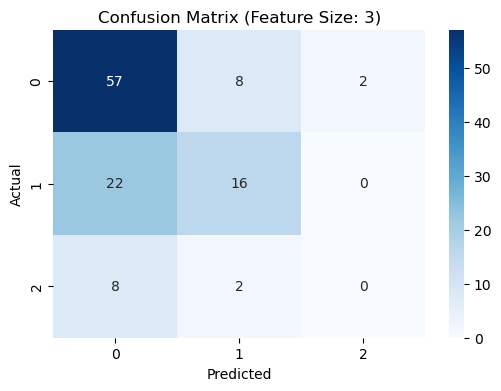


Feature Subset Size: 5
Selected Features: ['N Stage', 'Contralateral Breast Involvement', 'Pec/Chest Involvement', 'Race and Ethnicity', 'Neoadjuvant Anti-Her2 Neu Therapy']
Accuracy: 0.4957


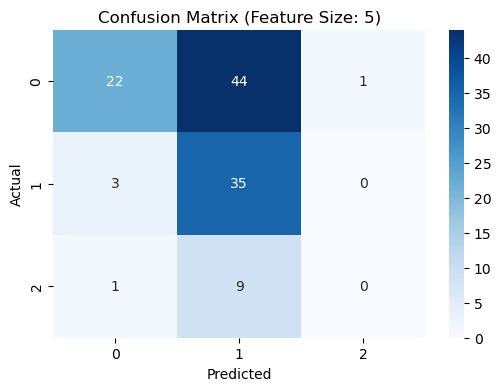


Feature Subset Size: 7
Selected Features: ['Multicentric/Multifocal', 'Mol Subtype', 'Slice Thickness ', 'Tumor Grade(N)(Nuclear)', 'N Stage', 'Lymphadenopathy or Suspicious Nodes', 'HER2']
Accuracy: 0.6522


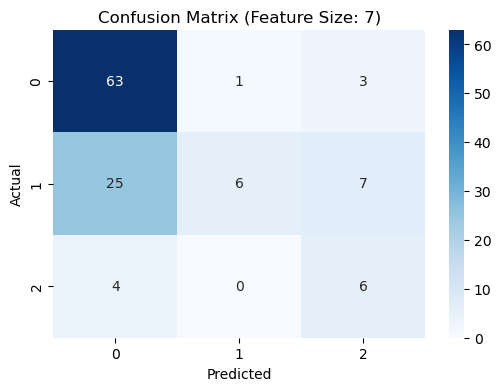


Feature Subset Size: 10
Selected Features: ['Pathologic response to Neoadjuvant therapy: Pathologic stage (T) following neoadjuvant therapy ', 'Received Neoadjuvant Therapy or Not', 'Histologic type', 'Acquisition Matrix', 'FOV Computed (Field of View) in cm ', 'Adjuvant Endocrine Therapy Medications ', 'N Stage', 'Tumor Grade(T) (Tubule)', 'Survival Months', 'Staging(Tumor Size)# [T]']
Accuracy: 0.6783


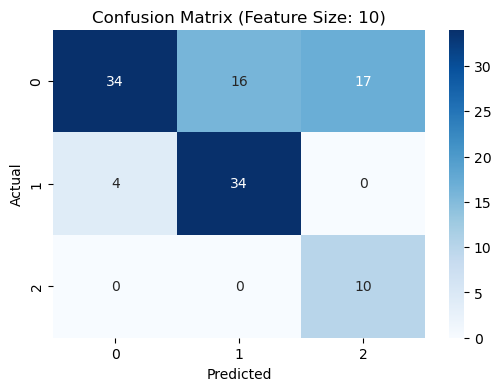

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random


# Define features and target
X = df_filled[features]
y = df_filled[target_col]

# Drop classes with fewer than 2 samples
class_counts = y.value_counts()
valid_classes = class_counts[class_counts >= 2].index

X = X[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Test different subset sizes
feature_sizes = [3,5, 7, 10]
results = {}

for size in feature_sizes:
    selected_features = random.sample(list(X.columns), size)
    
    model = GaussianNB()
    model.fit(X_train[selected_features], y_train)
    y_pred = model.predict(X_test[selected_features])
    
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[size] = {
        "features": selected_features,
        "accuracy": acc,
        "conf_matrix": conf_matrix
    }
    
    print(f"\nFeature Subset Size: {size}")
    print("Selected Features:", selected_features)
    print(f"Accuracy: {acc:.4f}")
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix (Feature Size: {size})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [149]:
selected_features = ['Radio Therapy','Neoadjuvant Chemotherapy', 'Tumor Size','Age']

In [150]:
model = GaussianNB()
model.fit(X_train[selected_features], y_train)
y_pred = model.predict(X_test[selected_features])

acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

results[size] = {
    "features": selected_features,
    "accuracy": acc,
    "conf_matrix": conf_matrix
}

print(f"\nFeature Subset Size: {size}")
print("Selected Features:", selected_features)
print(f"Accuracy: {acc:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix (Feature Size: {size})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

KeyError: "['Radio Therapy'] not in index"

Naive Bayes Accuracy (All Features): 0.9913
Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        67
         2.0       0.97      1.00      0.99        38
         3.0       1.00      0.90      0.95        10

    accuracy                           0.99       115
   macro avg       0.99      0.97      0.98       115
weighted avg       0.99      0.99      0.99       115



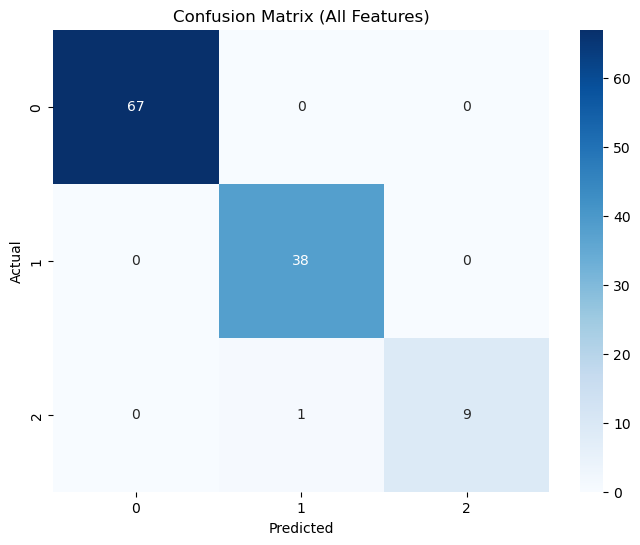

In [ ]:
# Baseline model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train full-feature Naive Bayes model
model_full = GaussianNB()
model_full.fit(X_train, y_train)

# Predict on test set
y_pred_full = model_full.predict(X_test)

# Evaluate
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"Naive Bayes Accuracy (All Features): {accuracy_full:.4f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_full))

# Confusion Matrix
conf_matrix_full = confusion_matrix(y_test, y_pred_full)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_full, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (All Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


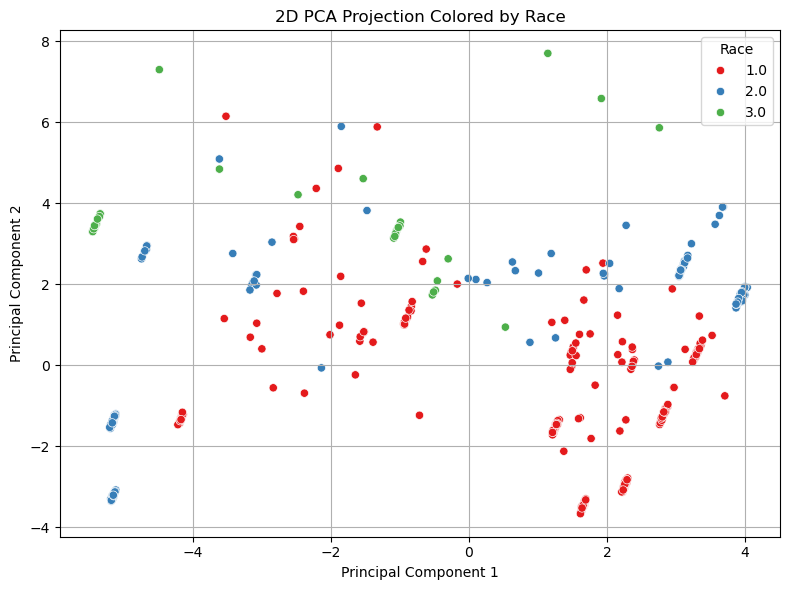

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca_vis = PCA(n_components=2)
X_train_pca_2d = pca_vis.fit_transform(X_train)

# Plot PCA components colored by Race
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca_2d[:, 0], y=X_train_pca_2d[:, 1], hue=y_train, palette="Set1")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection Colored by Race")
plt.legend(title="Race")
plt.grid(True)
plt.tight_layout()
plt.show()


## Evaluation

Number of PCA components selected: 22
Naive Bayes Accuracy (PCA Features): 0.9826


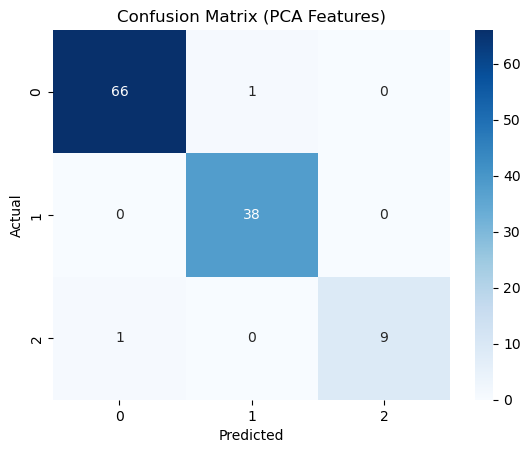

Classification Report:
               precision    recall  f1-score   support

         1.0       0.99      0.99      0.99        67
         2.0       0.97      1.00      0.99        38
         3.0       1.00      0.90      0.95        10

    accuracy                           0.98       115
   macro avg       0.99      0.96      0.97       115
weighted avg       0.98      0.98      0.98       115



In [ ]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fit PCA to retain 90% variance
pca_final = PCA(n_components=0.90)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

print(f"Number of PCA components selected: {pca_final.n_components_}")

# Train and predict
model_pca = GaussianNB()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

# Evaluate
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Naive Bayes Accuracy (PCA Features): {acc_pca:.4f}")

conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (PCA Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_pca))
